In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

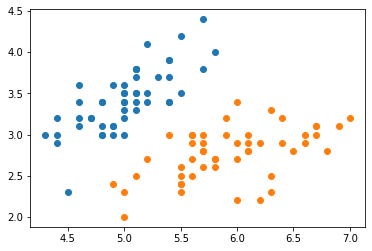

In [2]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train, y_train)
X_standard = std_scaler.transform(X)

In [6]:
from sklearn.svm import LinearSVC

In [20]:
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [8]:
def plot_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


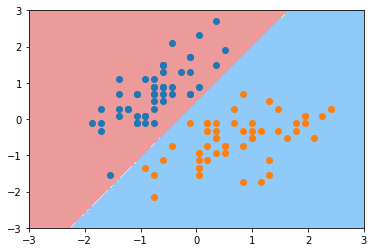

In [21]:
plot_desicion_boundry(svc, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

In [14]:
svc2 = LinearSVC(C=0.01, penalty='l2', multi_class='ovr')
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


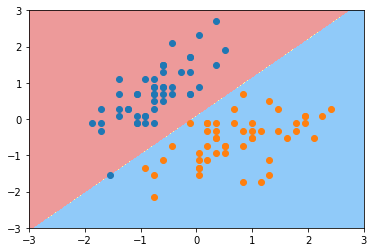

In [15]:
plot_desicion_boundry(svc2, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

In [25]:
svc2.coef_  # 因为sklearn封装的svc默认可以处理多分类问题，所以是二维数组

array([[ 0.4367142 , -0.41265359]])

In [17]:
def plot_svc_desicion_boundry(model, axis):
    # axis 横纵坐标轴的范围
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])* 100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#ED9A9A","#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    # w0*x0 + w1*x1 + b = 1
    # => x1 = -w0/w1 * x0 - b/w1 + 1/w1 
    # w0*x0 + w1*x1 + b = -1
    # => x1 = -w0/w1 * x0 - b/w1 - 1/w1 
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


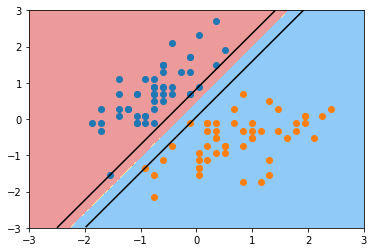

In [23]:
plot_svc_desicion_boundry(svc, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


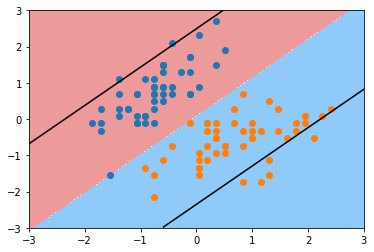

In [24]:
plot_svc_desicion_boundry(svc2, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

In [29]:
svc3 = LinearSVC(C=0.01, penalty='l2', multi_class='ovr')   # 默认
svc3.fit(X_standard, y)
svc3.coef_

array([[ 0.43671423, -0.4126532 ]])